# Erosion

The file Image1.mat contains a synthetic image created to understand the basic
operations erosion and dilation. Load the image and visualise it:
```matlab
load Image1.mat
imagesc(Image1)
imagegrid(gca,size(Image1));
colormap(gca,hot);
```

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import cv2

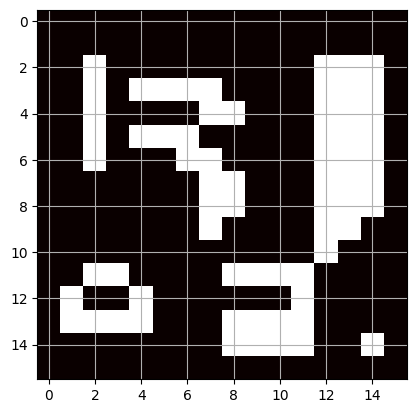

□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□
□□1□□□□□□□□□111□
□□1□1111□□□□111□
□□1□□□□11□□□111□
□□1□111□□□□□111□
□□1□□□11□□□□111□
□□□□□□□11□□□111□
□□□□□□□11□□□111□
□□□□□□□1□□□□11□□
□□□□□□□□□□□□1□□□
□□11□□□□1111□□□□
□1□□1□□□□□□1□□□□
□1111□□□1111□□□□
□□□□□□□□1111□□1□
□□□□□□□□□□□□□□□□


In [3]:
# Load the .mat file
mat = scipy.io.loadmat("Image1.mat")

# Extract the image data
image1 = mat["Image1"]

# Visualize the image
plt.imshow(image1, cmap="hot")
plt.grid(True)
plt.show()
print("\n".join(["".join(["1" if x else "□" for x in row]) for row in image1]))

## Exercise 1 
What is the image result if erosion is applied using a 3x3 box kernel? Answer this question with pen and paper.

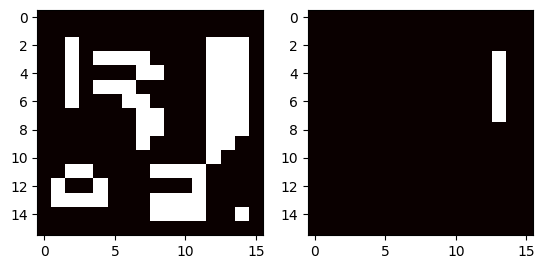

In [4]:
box_eroded_img = cv2.erode(image1, np.ones((3, 3), np.uint8), iterations=1)
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap="hot")
plt.subplot(1, 2, 2)
plt.imshow(box_eroded_img, cmap="hot")
plt.show()

In [5]:
size = (3, 3)

(
    cv2.getStructuringElement(cv2.MORPH_RECT, size),
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size),
    cv2.getStructuringElement(cv2.MORPH_CROSS, size),
)

(array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=uint8),
 array([[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]], dtype=uint8),
 array([[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]], dtype=uint8))

## Exercise 2 
What is the image result if erosion is applied using a 3x3 disk kernel? Answer this question with pen and paper.


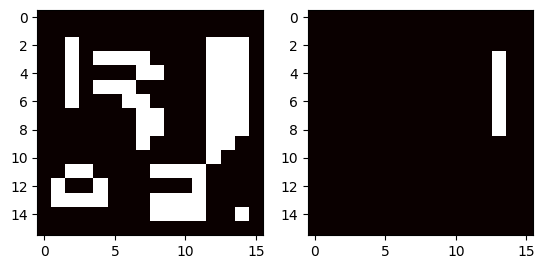

array([0, 1], dtype=uint8)

In [6]:
disk_eroded_img = cv2.erode(
    image1, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=1
)
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap="hot")
plt.subplot(1, 2, 2)
plt.imshow(disk_eroded_img, cmap="hot")
plt.show()
np.unique(disk_eroded_img)

In matlab we have:

```matlab
>> strel('square', 3).Neighborhood

ans =

  3x3 logical array

   1   1   1
   1   1   1
   1   1   1

>> strel('disk', 1).Neighborhood

ans =

  3x3 logical array

   0   1   0
   1   1   1
   0   1   0

>> 
```

To have same results in python we can use the following code:

In [7]:
print(cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
print()
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

[[1 1 1]
 [1 1 1]
 [1 1 1]]

[[0 1 0]
 [1 1 1]
 [0 1 0]]


## Dilation


Exercise 4 What is the image result if dilation is applied using a 3x3 box kernel? Answer this question with pen and paper.

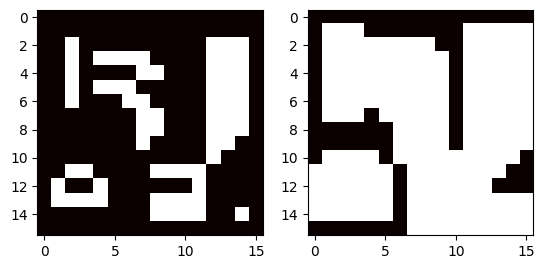

In [8]:
box_dilated_img = cv2.dilate(
    image1, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=1
)
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap="hot")
plt.subplot(1, 2, 2)
plt.imshow(box_dilated_img, cmap="hot")
plt.show()

Exercise 5 What is the image result if dilation is applied using a 3x3 disk kernel? Answer this question with pen and paper.

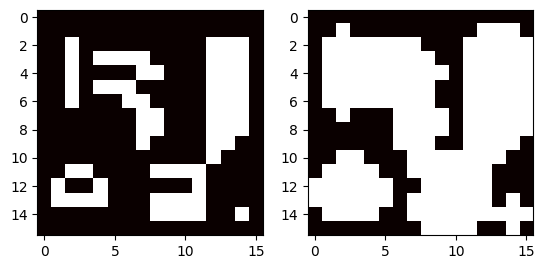

In [9]:
disk_dilated_img = cv2.dilate(
    image1, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=1
)
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap="hot")
plt.subplot(1, 2, 2)
plt.imshow(disk_dilated_img, cmap="hot")
plt.show()


# Opening

The opening operation is an erosion follow by a dilation.


## Exercise 7 
Implement a Matlab function mopen that realises an opening operation. The function should take the image and the structuring element as input
and return the opened image. Start the function by:

```matlab
function I2 = mopen(I,se)
%MOPEN Open image.
% I2 = MOPEN(I,SE) opens the image I with the structuring
% element SE and returns image I2
```

Test your function on Image1 using a 3x3 box SE. Use subplot to plot your
results together with the original image.

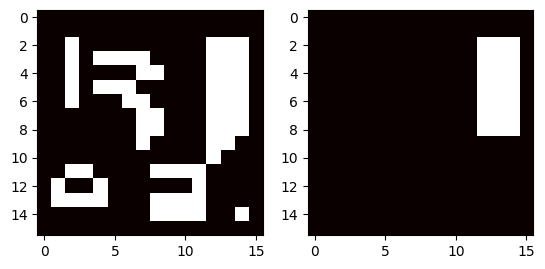

In [10]:
def mopen(img: np.ndarray, structring_element: np.ndarray) -> np.ndarray:
    tmp_img = cv2.erode(img, structring_element, iterations=1)
    return cv2.dilate(tmp_img, structring_element, iterations=1)


plt.subplot(1, 2, 1)
plt.imshow(image1, cmap="hot")
plt.subplot(1, 2, 2)
plt.imshow(mopen(image1, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))), cmap="hot")
plt.show()

Read the documentation for the Matlab function imopen.

## Exercise 8 
Use `imopen` on Image1. Use subplot to plot the result together with
the result obtained with your opening function.


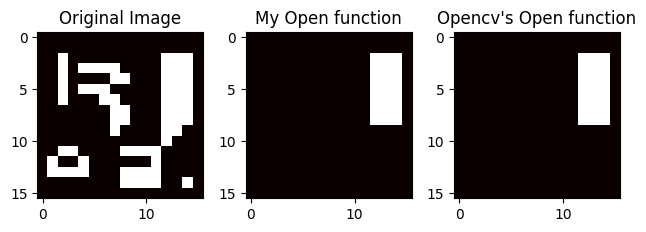

In [11]:
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap="hot")
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(mopen(image1, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))), cmap="hot")
plt.title("My Open function")
plt.subplot(1, 3, 3)
plt.imshow(
    cv2.morphologyEx(
        image1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    ),
    cmap="hot",
)
plt.title("Opencv's Open function")

plt.tight_layout()
plt.show()

# Closing

The closing operation is a dilation followed by an erosion.

## Exercise 9 
Implement a Matlab function `mclose` that realises a closing operation. The function should take the image and the structuring element as input
and return the closed image.
Test your function on Image1 using a 3x3 disc SE. Use subplot to plot your
results together with the original image.


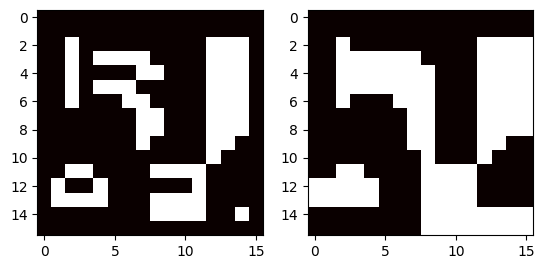

In [12]:
def mclose(img: np.ndarray, structring_element: np.ndarray) -> np.ndarray:
    tmp_img = cv2.dilate(img, structring_element, iterations=1)
    return cv2.erode(tmp_img, structring_element, iterations=1)


plt.subplot(1, 2, 1)
plt.imshow(image1, cmap="hot")
plt.subplot(1, 2, 2)
plt.imshow(mclose(image1, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))), cmap="hot")
plt.show()

Read the documentation for the Matlab function imclose.

## Exercise 10 

Use imclose on Image1. Use subplot to plot the result together
with the result obtained with your opening function.

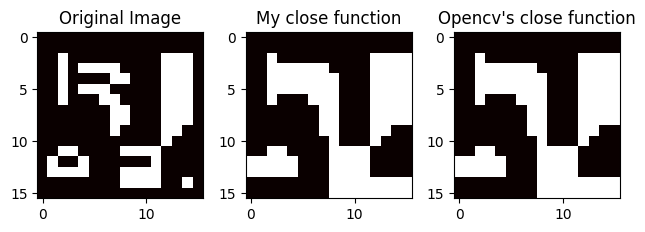

In [13]:
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap="hot")
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(mclose(image1, cv2.getStructuringElement(cv2.MORPH_RECT, size)), cmap="hot")
plt.title("My close function")
plt.subplot(1, 3, 3)
plt.imshow(
    cv2.morphologyEx(
        image1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, size)
    ),
    cmap="hot",
)
plt.title("Opencv's close function")

plt.tight_layout()
plt.show()

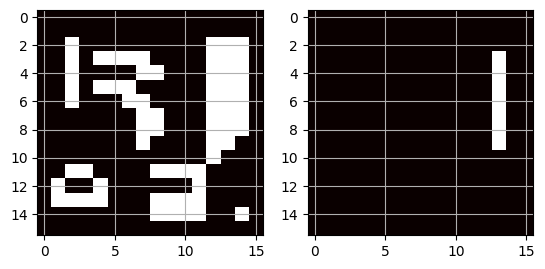

In [14]:
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap="hot")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.imshow(
    cv2.erode(
        image1, np.array([[1, 1, 1], [1, 1, 0], [1, 0, 0]], np.uint8), iterations=1
    ),
    cmap="hot",
)
plt.grid(True)
plt.show()

In [15]:
base_img = np.zeros_like(image1, np.uint8)
eroded_img = cv2.erode(image1, np.ones((3, 3), np.uint8), iterations=1)
kernel = np.zeros((3, 3), np.uint8)
center = (1, 1)
kernel[center] = 1

for i,j in np.ndindex(kernel.shape):
    continue
    if (i, j) == center:
        continue
    print(i, j)
    kernel[i, j] = 1
    eroded_img = cv2.dilate(eroded_img, kernel, iterations=1)
    base_img = np.logical_or(base_img, eroded_img)

    plt.subplot(1, 4, 1)
    plt.imshow(image1, cmap="hot")

    plt.subplot(1, 4, 2)
    plt.imshow(base_img, cmap="hot")
    plt.title("base image")

    plt.subplot(1, 4, 3)
    plt.imshow(eroded_img, cmap="hot")

    plt.subplot(1, 4, 4)
    plt.imshow(kernel, cmap="hot")
    plt.title(f"Kernel {i}, {j}")

    plt.show()
    kernel[i, j] = 0



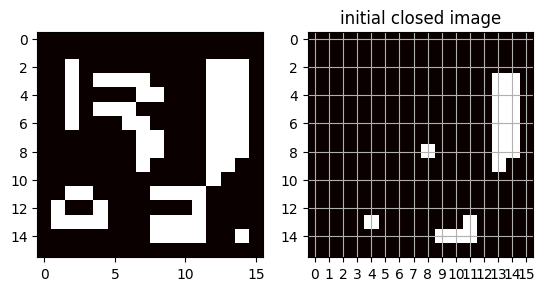

loop


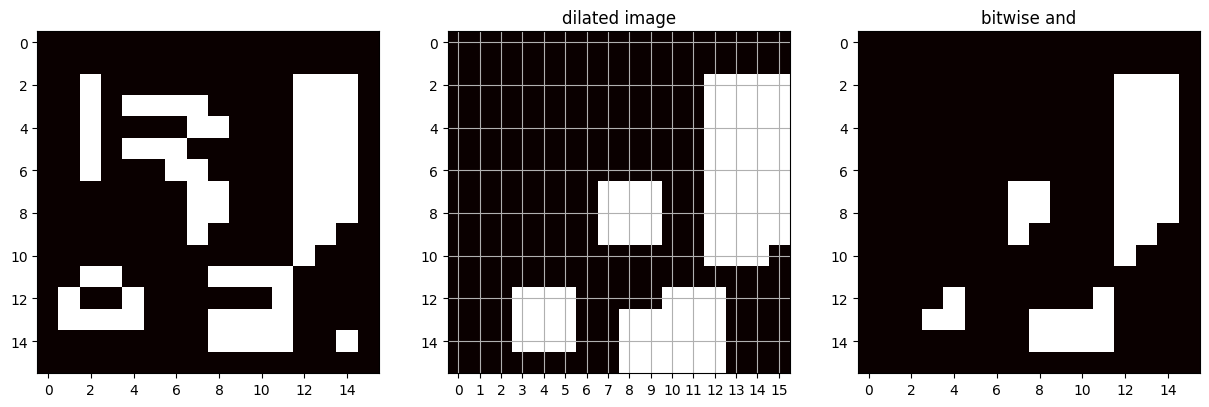

loop


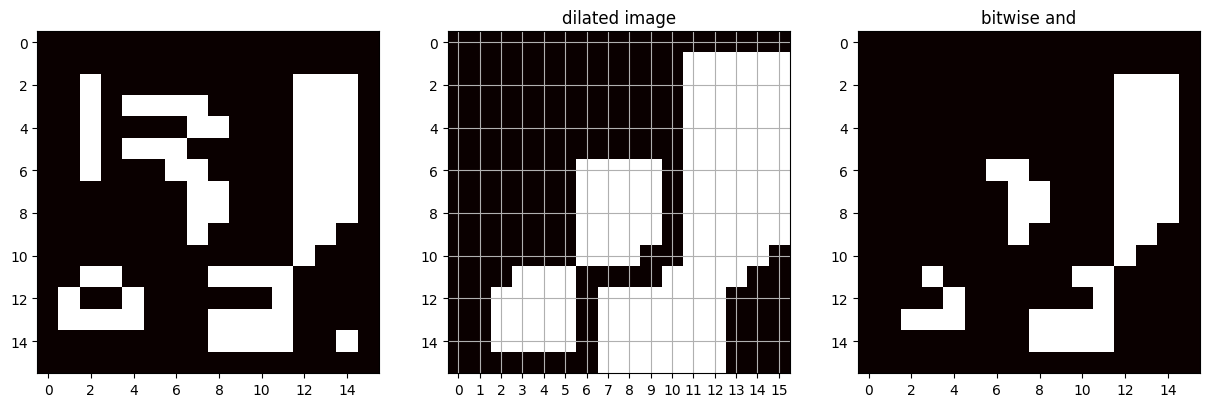

loop


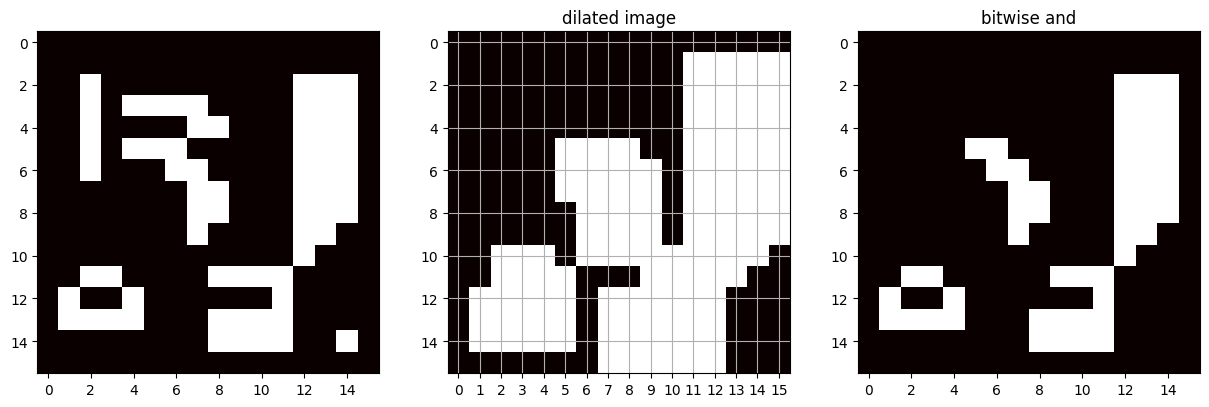

loop


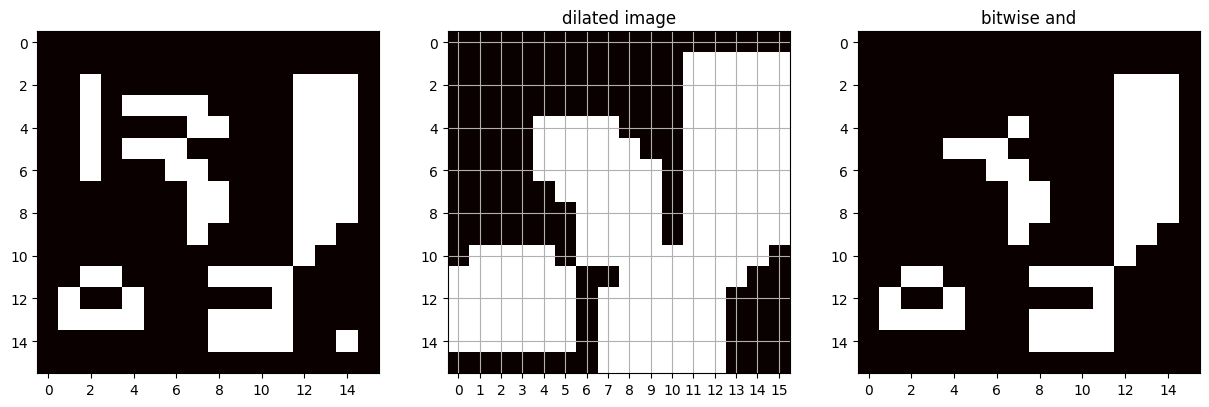

loop


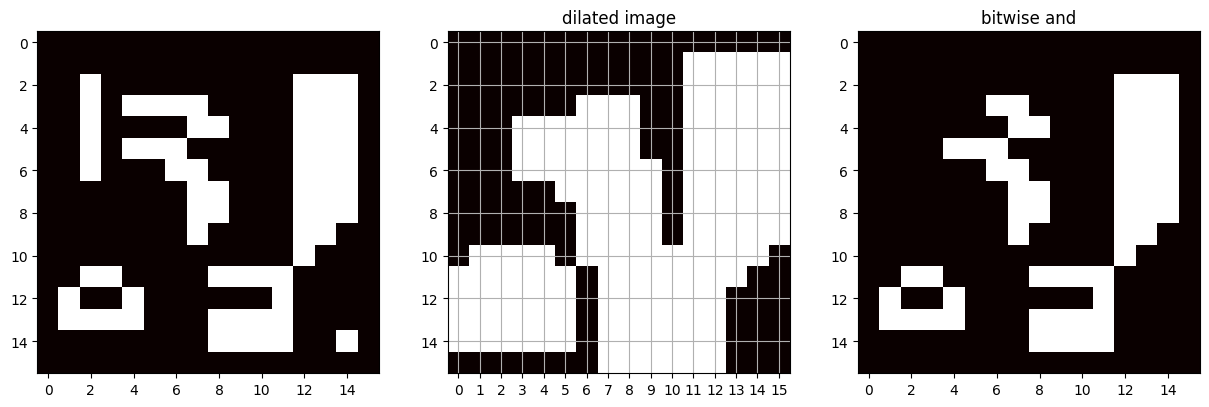

loop


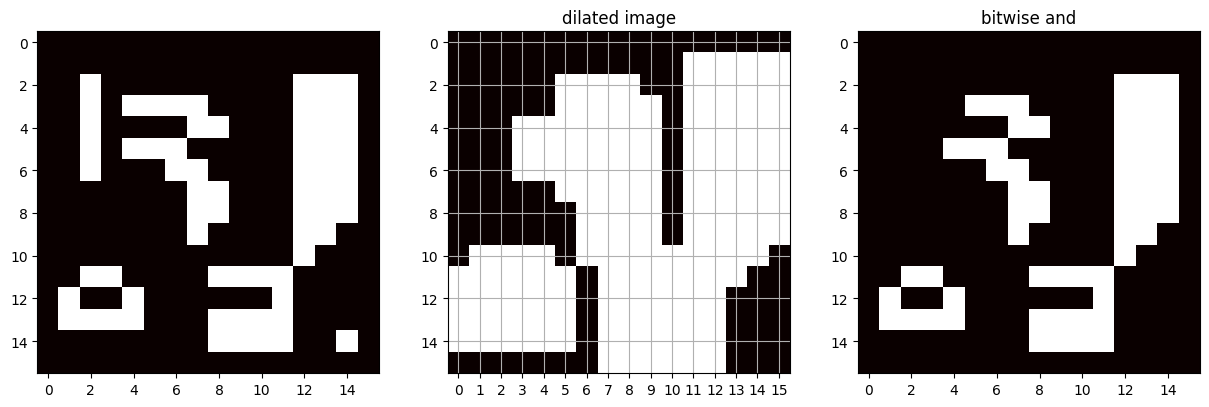

loop


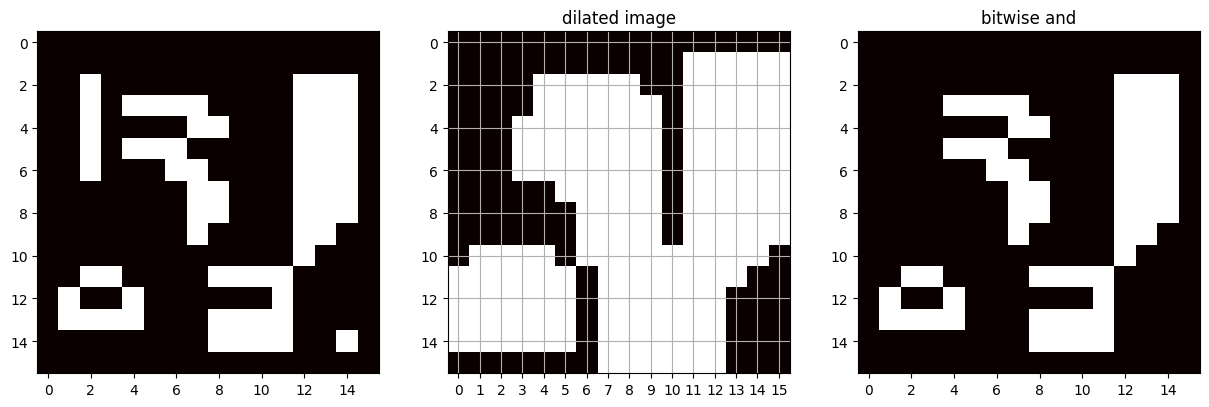

loop


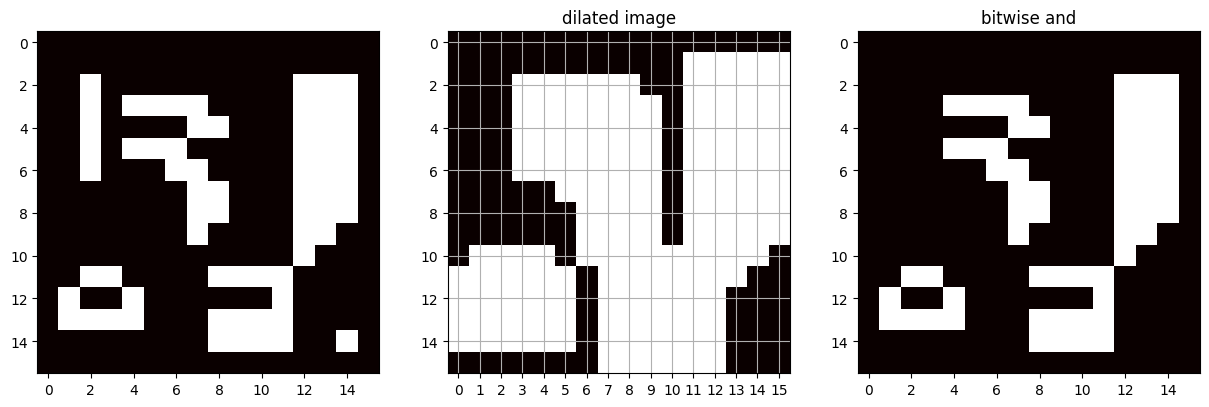

In [16]:
limit_size = ls =  5
eroded_img = cv2.erode(image1, cv2.getStructuringElement(cv2.MORPH_CROSS, (ls//2, ls//2)), iterations=1)
# eroded_img = cv2.dilate(eroded_img, cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5)), iterations=1)

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap="hot")
plt.subplot(1, 2, 2)
plt.imshow(eroded_img, cmap="hot")
plt.title("initial closed image")
plt.grid(True)
plt.xticks(range(0, eroded_img.shape[1]))
plt.show()

while 1:
    print("loop")
    new_img = cv2.dilate(eroded_img, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=1)
    new_img1 = cv2.bitwise_and(new_img, image1)
   

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image1, cmap="hot")
    plt.subplot(1, 3, 2)
    plt.imshow(new_img, cmap="hot")
    plt.title("dilated image")
    plt.grid(True)
    plt.xticks(range(0, new_img.shape[1]))
    plt.subplot(1, 3, 3)
    plt.imshow(new_img1, cmap="hot")
    plt.title("bitwise and")

    plt.show()

    if np.array_equal(eroded_img, new_img1):
        break
    eroded_img = new_img1



# Brain CT image

The goal of this exercise is to apply morphology on a real image. The exercise
involves both thresholding and morphological operations.
Load the image `brainCT.png` and display it:

```matlab
clear all,close all,clc;
I = imread(’BrainCT.png’);
imshow(I);
```
The goal of the exercise is to extract the skull bones clearly from the image.

In [17]:
brain_img = cv2.imread("BrainCT.png")
print(brain_img.shape)
print(np.array_equal(brain_img[..., 0], brain_img[..., 1]), np.array_equal(brain_img[..., 1], brain_img[..., 2]))

(342, 290, 3)
True True


As we can see, all channels are the same, so we can use any of the channels to perform the operations. Let's use the first channel.

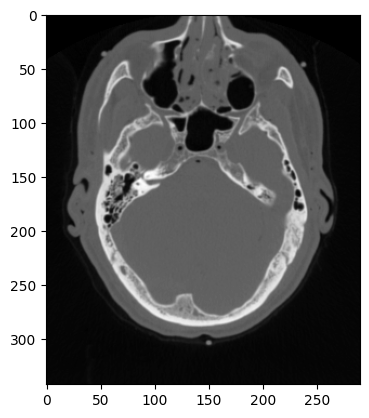

In [18]:
brain_img = brain_img[..., 0]
plt.imshow(brain_img, cmap="gray")
plt.show()

## Exercise 12 
Start by inspecting the histogram of the image. Do this by using
either `imhist` or `imtool`.
Try to find a threshold that separates the bone from the background. Apply the
threshold, `T`:

```matlab
Ibone = (I > T)
```

It is not possible to find a perfect threshold. The goal of the next exercise is to
close holes in the bones while trying to keep the overall shape.

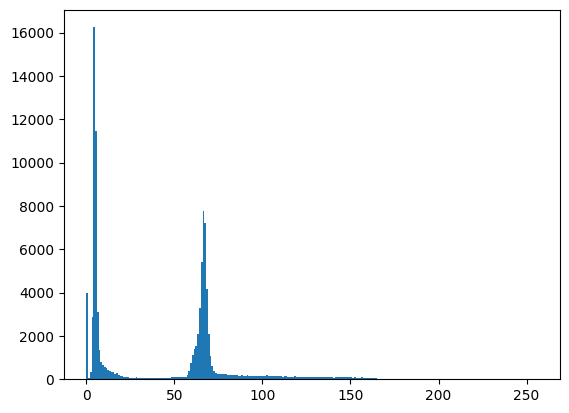

In [19]:
plt.hist(brain_img.ravel(), 256, [0, 256])
plt.show()

In [33]:
# use slider to find the threshold
def nothing(x):
    pass

cv2.namedWindow("Find bone threshold")
cv2.createTrackbar("lower threshold", "Find bone threshold", 0, 255, nothing)
cv2.createTrackbar("upper threshold", "Find bone threshold", 1, 255, nothing)

try:
    while 1:
        lower_threshold = cv2.getTrackbarPos("lower threshold", "Find bone threshold")
        upper_threshold = cv2.getTrackbarPos("upper threshold", "Find bone threshold")
        if lower_threshold >= upper_threshold:
            cv2.setTrackbarPos("upper threshold", "Find bone threshold", lower_threshold + 1)
            continue
        bone_img = cv2.inRange(brain_img, lower_threshold, upper_threshold)
        cv2.imshow("Find bone threshold", bone_img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
except KeyboardInterrupt:
    print("Interrupted by user, you can press q to quit more peacefully next time! 🕊✌️")


print(f"the final lower threshold is {lower_threshold} and the final upper threshold is {upper_threshold}")
cv2.destroyAllWindows()


Interrupted by user, you can press q to quit more peacefully next time! 🕊✌️
the final lower threshold is 75 and the final upper threshold is 255


After playing with knobs, we can find a threshold of 75. Let's use it.

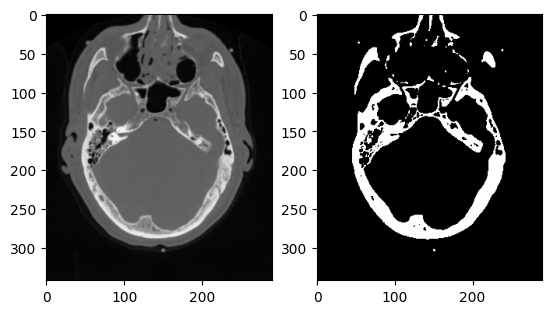

In [37]:
bone_img = (brain_img > 75).astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(brain_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(bone_img, cmap="gray")
plt.show()

## Exercise 13 
Experiment with different combinations of opening and closing
with different kernel sizes on the binary bone image. 
You should also try combinations where the kernel used for opening is different from the kernel used in
the closing.
Select your best result from the exercise above and call it Imask use this result
for the next exercises.

In [58]:
cv2.namedWindow(win_name := "Find best morphological operation")

cv2.createTrackbar(
    (order_name := "operation order\n0: Open-Close\n1: Close-Open"),
    win_name,
    0,
    1,
    nothing,
)
cv2.createTrackbar(
    (open_kernel_size_name := "Open kernel size"), win_name, 1, 10, nothing
)
cv2.createTrackbar(
    (open_kernel_shape_name := "Open kernel shape\n0: RECT\n1: CROSS\n2: ELLIPSE"),
    win_name,
    0,
    2,
    nothing,
)
cv2.createTrackbar(
    (close_kernel_size_name := "Close kernel size"), win_name, 1, 10, nothing
)
cv2.createTrackbar(
    (close_kernel_shape_name := "Close kernel shape\n0: RECT\n1: CROSS\n2: ELLIPSE"),
    win_name,
    0,
    2,
    nothing,
)
# note: if you run `print(cv2.MORPH_RECT, cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE)` you will get (0, 1, 2) respectively and that's why I used this order in the trackbar

try:
    while 1:
        order = cv2.getTrackbarPos(order_name, win_name)
        open_kernel_size = cv2.getTrackbarPos(open_kernel_size_name, win_name)
        open_kernel_shape = cv2.getTrackbarPos(open_kernel_shape_name, win_name)
        close_kernel_size = cv2.getTrackbarPos(close_kernel_size_name, win_name)
        close_kernel_shape = cv2.getTrackbarPos(close_kernel_shape_name, win_name)

        # open_kernel = cv2.getStructuringElement(open_kernel_shape, (open_kernel_size, open_kernel_size))
        # close_kernel = cv2.getStructuringElement(close_kernel_shape, (close_kernel_size, close_kernel_size))
        text = np.zeros((200, bone_img.shape[1]), np.uint8)
        text_args = [
            (5, text.shape[0] // 2),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255, 255, 255),
            2,
            cv2.LINE_AA,
        ]

        match (order, open_kernel_size, close_kernel_size):
            case (0, 0, 0):
                final_image = cv2.putText(text, "kernel_size == 0!", *text_args)
            case (_, _, 0):
                # open operation only
                final_img = cv2.morphologyEx(
                    bone_img,
                    cv2.MORPH_OPEN,
                    cv2.getStructuringElement(
                        open_kernel_shape, (open_kernel_size, open_kernel_size)
                    ),
                )
                cv2.putText(text, "Open only", *text_args)
            case (_, 0, _):
                # close operation only
                final_img = cv2.morphologyEx(
                    bone_img,
                    cv2.MORPH_CLOSE,
                    cv2.getStructuringElement(
                        close_kernel_shape, (close_kernel_size, close_kernel_size)
                    ),
                )
                cv2.putText(text, "Close only", *text_args)
            case (0, _, _):
                # open-close operation
                final_img = cv2.morphologyEx(
                    bone_img,
                    cv2.MORPH_OPEN,
                    cv2.getStructuringElement(
                        open_kernel_shape, (open_kernel_size, open_kernel_size)
                    ),
                )
                final_img = cv2.morphologyEx(
                    final_img,
                    cv2.MORPH_CLOSE,
                    cv2.getStructuringElement(
                        close_kernel_shape, (close_kernel_size, close_kernel_size)
                    ),
                )
                cv2.putText(text, "Open-Close", *text_args)
            case (1, _, _):
                # close-open operation
                final_img = cv2.morphologyEx(
                    bone_img,
                    cv2.MORPH_CLOSE,
                    cv2.getStructuringElement(
                        close_kernel_shape, (close_kernel_size, close_kernel_size)
                    ),
                )
                final_img = cv2.morphologyEx(
                    final_img,
                    cv2.MORPH_OPEN,
                    cv2.getStructuringElement(
                        open_kernel_shape, (open_kernel_size, open_kernel_size)
                    ),
                )
                cv2.putText(text, "Close-Open", *text_args)

        cv2.imshow(win_name, np.vstack([text, final_img * 255]))
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
except KeyboardInterrupt:
    print("Interrupted by user, you can press q to quit more peacefully next time! 🕊✌️")
finally:
    cv2.destroyAllWindows()
print(f"the final order is {order}")
print(
    f"the final open kernel size is {open_kernel_size} and the final open kernel shape is {open_kernel_shape}"
)
print(
    f"the final close kernel size is {close_kernel_size} and the final close kernel shape is {close_kernel_shape}"
)

the final order is 0
the final open kernel size is 0 and the final open kernel shape is 0
the final close kernel size is 10 and the final close kernel shape is 0


After playing with knobs, we can find that a 10x10 box kernel for closing and a no opening kernel gives the best result.

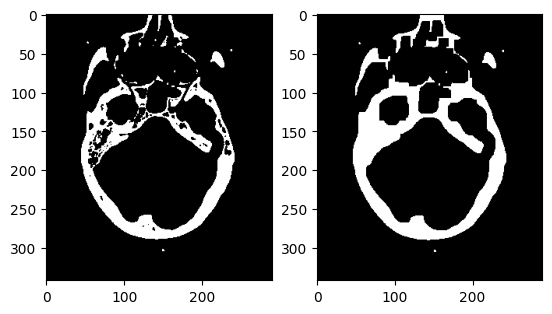

In [65]:
plt.subplot(1, 2, 1)
plt.imshow(bone_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(
    bone_mask:=cv2.morphologyEx(
        bone_img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
    ),
    cmap="gray",
)
plt.show()

## Exercise 14 

Compute the boundary of the bones by use of dilation:
- Dilate Imask with a small kernel
- Subtract Imask from the dilated image
Show the boundary image

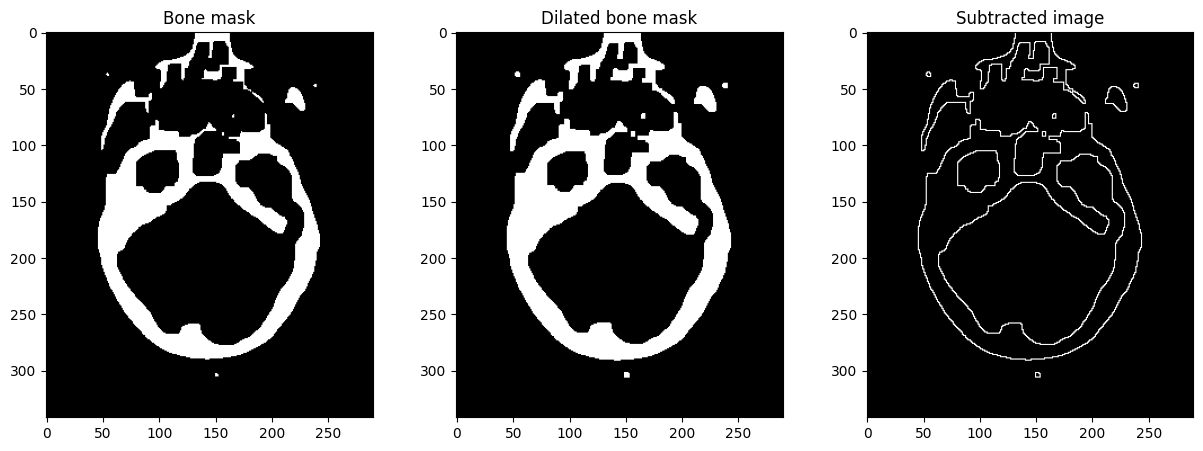

In [70]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bone_mask, cmap="gray")
plt.title("Bone mask")

plt.subplot(1, 3, 2)
plt.imshow(bone_mask_dilated:=cv2.dilate(bone_mask, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))), cmap="gray")   
plt.title("Dilated bone mask")

plt.subplot(1, 3, 3)
plt.imshow(boundry_dilated:=cv2.bitwise_xor(bone_mask_dilated, bone_mask), cmap="gray")
plt.title("Subtracted image")

plt.show()

## Exercise 15 
Compute the boundary of the bones by use of erosion:
- Erode Imask with a small kernel
- Subtract eroded image from Imask

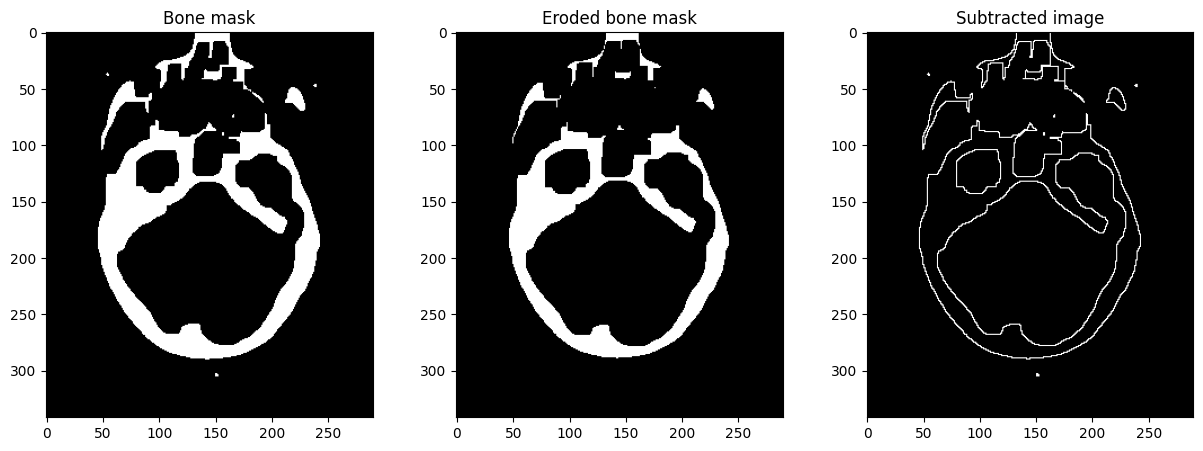

In [71]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bone_mask, cmap="gray")
plt.title("Bone mask")

plt.subplot(1, 3, 2)
plt.imshow(bone_mask_eroded:=cv2.erode(bone_mask, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))), cmap="gray")   
plt.title("Eroded bone mask")

plt.subplot(1, 3, 3)
plt.imshow(boundry_eroded:=cv2.bitwise_xor(bone_mask_eroded, bone_mask), cmap="gray")
plt.title("Subtracted image")

plt.show()

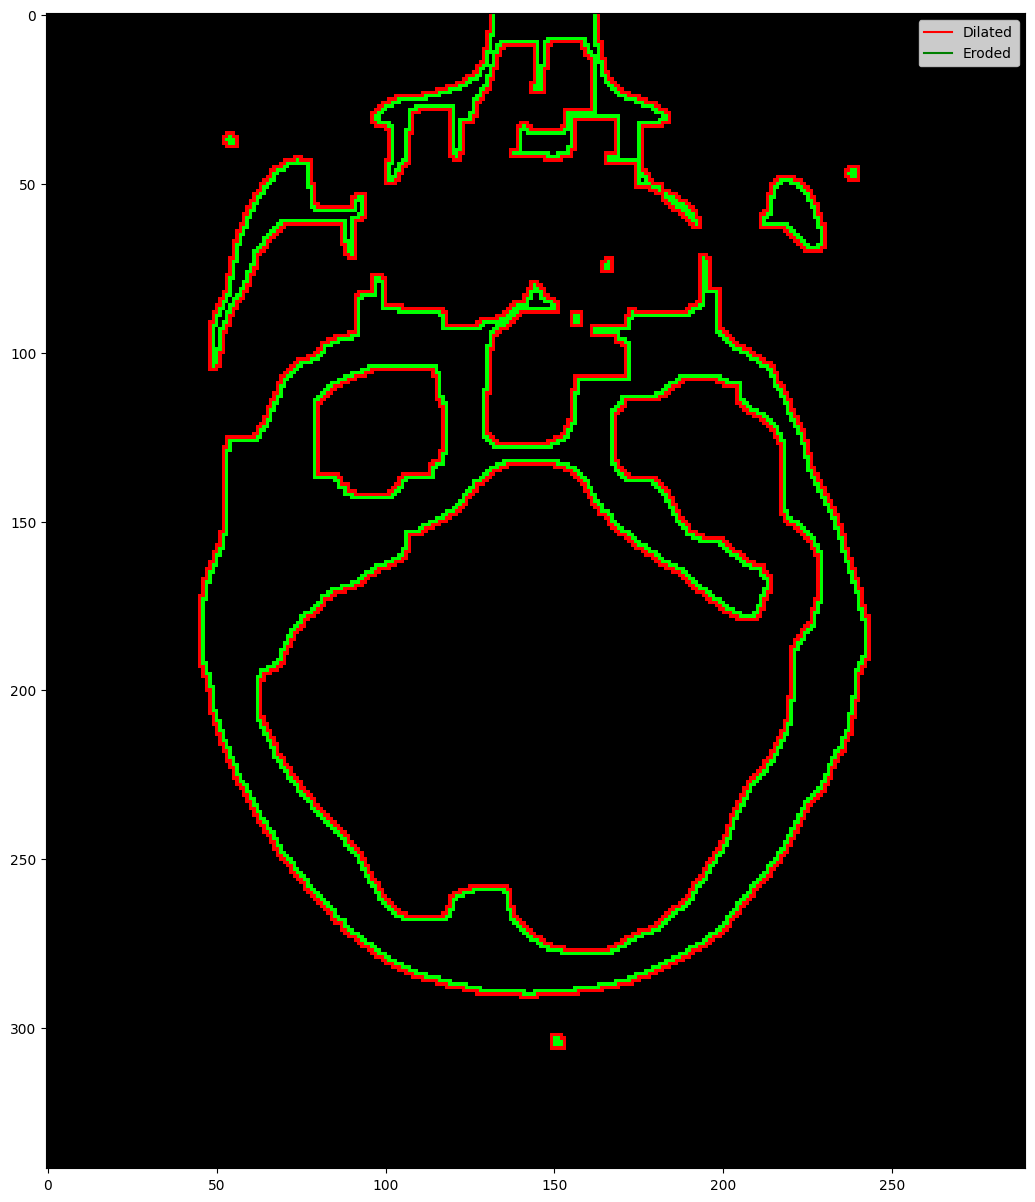

In [80]:
plt.figure(figsize=(45, 15))
plt.plot(0, 0, "r", label="Dilated")
plt.plot(0, 0, "g", label="Eroded")
plt.imshow(np.stack([boundry_dilated*255, boundry_eroded*255, np.zeros_like(bone_img)], axis=-1))
plt.legend()
plt.show()